In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, r2_score

In [4]:
df = pd.read_csv('big4_financial_risk_compliance.csv')

In [11]:
print(df.isnull().sum())
print(f"Duplicate rows: {df.duplicated().sum()}")
print(df.describe())
print(df.select_dtypes(include=['object']).head())

Year                         0
Firm_Name                    0
Total_Audit_Engagements      0
High_Risk_Cases              0
Compliance_Violations        0
Fraud_Cases_Detected         0
Industry_Affected            0
Total_Revenue_Impact         0
AI_Used_for_Auditing         0
Employee_Workload            0
Audit_Effectiveness_Score    0
Client_Satisfaction_Score    0
dtype: int64
Duplicate rows: 0
              Year  Total_Audit_Engagements  High_Risk_Cases  \
count   100.000000               100.000000       100.000000   
mean   2022.320000              2784.520000       277.730000   
std       1.780251              1281.863073       135.735174   
min    2020.000000               603.000000        51.000000   
25%    2021.000000              1768.250000       162.500000   
50%    2022.000000              2650.000000       293.000000   
75%    2024.000000              4008.750000       395.500000   
max    2025.000000              4946.000000       500.000000   

       Compliance_Vi

In [13]:
cols_to_check = ['High_Risk_Cases', 'Compliance_Violations', 'Fraud_Cases_Detected', 'Total_Revenue_Impact']

for col in cols_to_check:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

C:\Users\Ali\AppData\Local\Temp\ipykernel_1976\187247507.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\Ali\AppData\Local\Temp\ipykernel_1976\187247507.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\Ali\AppData\Local\Temp\ipykernel_1976\187247507.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\Ali\AppData\Local\Temp\ipykernel_1976\187247507.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [15]:
df['Distress_Score'] = (
    (df['High_Risk_Cases'] * 0.3) +  
    (df['Compliance_Violations'] * 0.2) +
    (df['Fraud_Cases_Detected'] * 0.4) +  
    (df['Total_Revenue_Impact'].abs() * 0.1)
)
df = df.replace({'Yes': 1, 'No': 0})

C:\Users\Ali\AppData\Local\Temp\ipykernel_1976\2726014564.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Yes': 1, 'No': 0})


In [17]:
X = df.drop(columns=['Distress_Score', 'Firm_Name', 'Industry_Affected'])
y = df['Distress_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [13]:
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

MAE: 13.055601999999988
R^2 Score: 0.8994957016761365


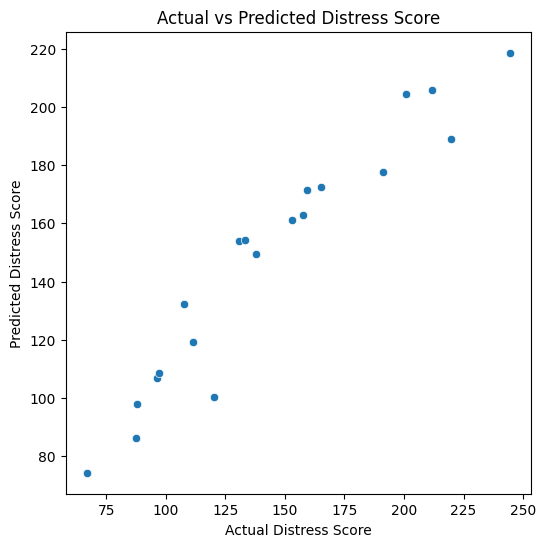

In [15]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Distress Score")
plt.ylabel("Predicted Distress Score")
plt.title("Actual vs Predicted Distress Score")
plt.show()

In [13]:
df.head()

,Year,Firm_Name,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Industry_Affected,Total_Revenue_Impact,AI_Used_for_Auditing,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score,Distress_Score
0,2020,PwC,2829,51,123,39,Healthcare,114.24,0,57,5.8,8.4,66.924
1,2022,Deloitte,3589,185,30,60,Healthcare,156.98,1,58,5.3,6.7,101.198
2,2020,PwC,2438,212,124,97,Healthcare,131.83,0,76,6.1,6.2,140.383
3,2021,PwC,2646,397,55,97,Healthcare,229.11,0,60,5.1,8.6,191.811
4,2020,PwC,2680,216,99,46,Healthcare,48.00,0,51,9.1,6.7,107.800


In [20]:
df

,Year,Firm_Name,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Industry_Affected,Total_Revenue_Impact,AI_Used_for_Auditing,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score,Distress_Score
0,2020,PwC,2829,51,123,39,Healthcare,114.24,0,57,5.8,8.4,66.924
1,2022,Deloitte,3589,185,30,60,Healthcare,156.98,1,58,5.3,6.7,101.198
2,2020,PwC,2438,212,124,97,Healthcare,131.83,0,76,6.1,6.2,140.383
3,2021,PwC,2646,397,55,97,Healthcare,229.11,0,60,5.1,8.6,191.811
4,2020,PwC,2680,216,99,46,Healthcare,48.00,0,51,9.1,6.7,107.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022,KPMG,4179,77,58,69,Healthcare,89.79,1,74,7.6,5.6,71.279
96,2020,Ernst & Young,2119,112,153,59,Tech,182.06,0,42,8.4,9.3,106.006
97,2021,Deloitte,3810,463,35,96,Healthcare,349.04,0,55,6.4,6.5,219.204
98,2025,Deloitte,1896,110,151,14,Finance,456.08,0,74,8.7,7.1,114.408


In [17]:
firm_mean_scores = df.groupby("Firm_Name")["Distress_Score"].mean().reset_index()
firm_mean_scores_sorted = firm_mean_scores.sort_values(by="Distress_Score", ascending=True)
most_trustworthy_firm = firm_mean_scores_sorted.iloc[0]

print("Most Trustworthy Firm:")
print(most_trustworthy_firm)

Most Trustworthy Firm:
Firm_Name               PwC
Distress_Score    140.66596
Name: 3, dtype: object


In [17]:
firm_mean_scores_sorted

,Firm_Name,Distress_Score
3,PwC,140.665960
0,Deloitte,153.934800
1,Ernst & Young,154.973304
2,KPMG,162.536864


In [19]:
firm_counts = df["Firm_Name"].value_counts()
print(firm_counts)

Firm_Name
Deloitte         30
PwC              25
Ernst & Young    23
KPMG             22
Name: count, dtype: int64


2025-03-14 00:48:36.874 Serialization of dataframe to Arrow table was unsuccessful due to: ('Input object was not a NumPy array', 'Conversion failed for column Firm_Name with type object'). Applying automatic fixes for column types to make the dataframe Arrow-compatible.


ArrowTypeError: ('Input object was not a NumPy array', 'Conversion failed for column Firm_Name with type object')

In [25]:
import pandas as pd


# Ensure correct data types
df["Firm_Name"] = df["Firm_Name"].astype(str)  # Ensure Firm_Name is a string

# Compute Distress Score
df['Distress_Score'] = (
    (df['High_Risk_Cases'].astype(float) * 0.3) +   
    (df['Compliance_Violations'].astype(float) * 0.2) +
    (df['Fraud_Cases_Detected'].astype(float) * 0.4) +  
    (df['Total_Revenue_Impact'].abs().astype(float) * 0.1)
)

# Group by Firm and Calculate the Mean Distress Score
firm_mean_scores = df.groupby("Firm_Name", as_index=False)["Distress_Score"].mean()

print(firm_mean_scores)


       Firm_Name  Distress_Score
0       Deloitte      153.934800
1  Ernst & Young      154.973304
2           KPMG      162.536864
3            PwC      140.665960


2025-06-24 17:49:35.226 
  command:

    streamlit run C:\Users\Ali\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-24 17:49:35.231 Session state does not function when running a script without `streamlit run`
